# FMCA interface

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import time
import FMCA

In [2]:
dim = 1
N = 2000
cov = FMCA.CovarianceKernel("Matern52", 0.05)
pts = np.array(np.sort(np.random.rand(dim, N)), order='F')

In [3]:
Chol = FMCA.PivotedCholesky(cov, pts, 1e-3)
L = Chol.matrixL()
Chol.computeFullPiv(cov, pts, 1e-3)
L2 = Chol.matrixL()

N: 2000 max number of cols: 2000 rel tol: 2 initial trace: 2000
steps: 56 trace error: 1.91399
lambda min: -4.952e-15 lambda max: 237.998 step: 45


In [4]:
K = cov.eval(pts,pts)
Keps = L @ L.transpose()
Keps2 = L2 @ L2.transpose()
print(np.linalg.norm(K - Keps) / np.linalg.norm(K))
print(np.linalg.norm(K - Keps2) / np.linalg.norm(K))

0.0009007560915107847
0.0007513288053138114


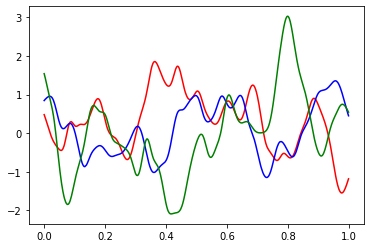

In [5]:
plt.plot(pts[0,:],L @ np.random.randn(L.shape[1],1),'r')
plt.plot(pts[0,:],L @ np.random.randn(L.shape[1],1),'b')
plt.plot(pts[0,:],L @ np.random.randn(L.shape[1],1),'g')
plt.show()